<a href="https://colab.research.google.com/github/barauna-lo/Computational_Statistics/blob/main/CAP417_FINAL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img src=https://raw.githubusercontent.com/barauna-lo/CAP4213-Deep-Learning/main/logoinpe.png align=”middle”>](https://www.gov.br/inpe/pt-br)

[<center><img src="https://github.com/barauna-lo/Deep-Learning/blob/main/LogoCAP.png?raw=true" width = 450 align="middle"></center>](http://www.inpe.br/posgraduacao/cap/)


# FRB Times Series Data Analyse


* Ellen Tuanne
* [Luan Orion Baraúna](https://www.linkedin.com/in/luan-orion-barauna/)
* Johan?

In this work we will present the time series analysis of the Fast Radio Burst (FRB) FRB20180725A available on the CHIME website and published in the first CHIME FRB catalog in The [Astrophysical Journal.](https://iopscience.iop.org/article/10.3847/1538-4365/ac33ab)

This series was accessed from the [tutorial]((https://chime-frb-open-data.github.io/waterfall/)) available on the collaboration website and adapted so that only the radio time series was extracted.

All time series analysis tools were used in the "Computational Statistics" course of the postgraduate program in [Applied Computing](http://www.inpe.br/posgraduacao/cap/) at the [National Institute for Space Research](https://www.gov.br/inpe/pt-br), Part C, taught by Professor Reinaldo Rosa.

The main discution behind this analyses can be found at [Multifractal characteristics of the low latitude equatorial ionospheric E–F valley region irregularities](https://www.sciencedirect.com/science/article/abs/pii/S0960077922000194?via%3Dihub).

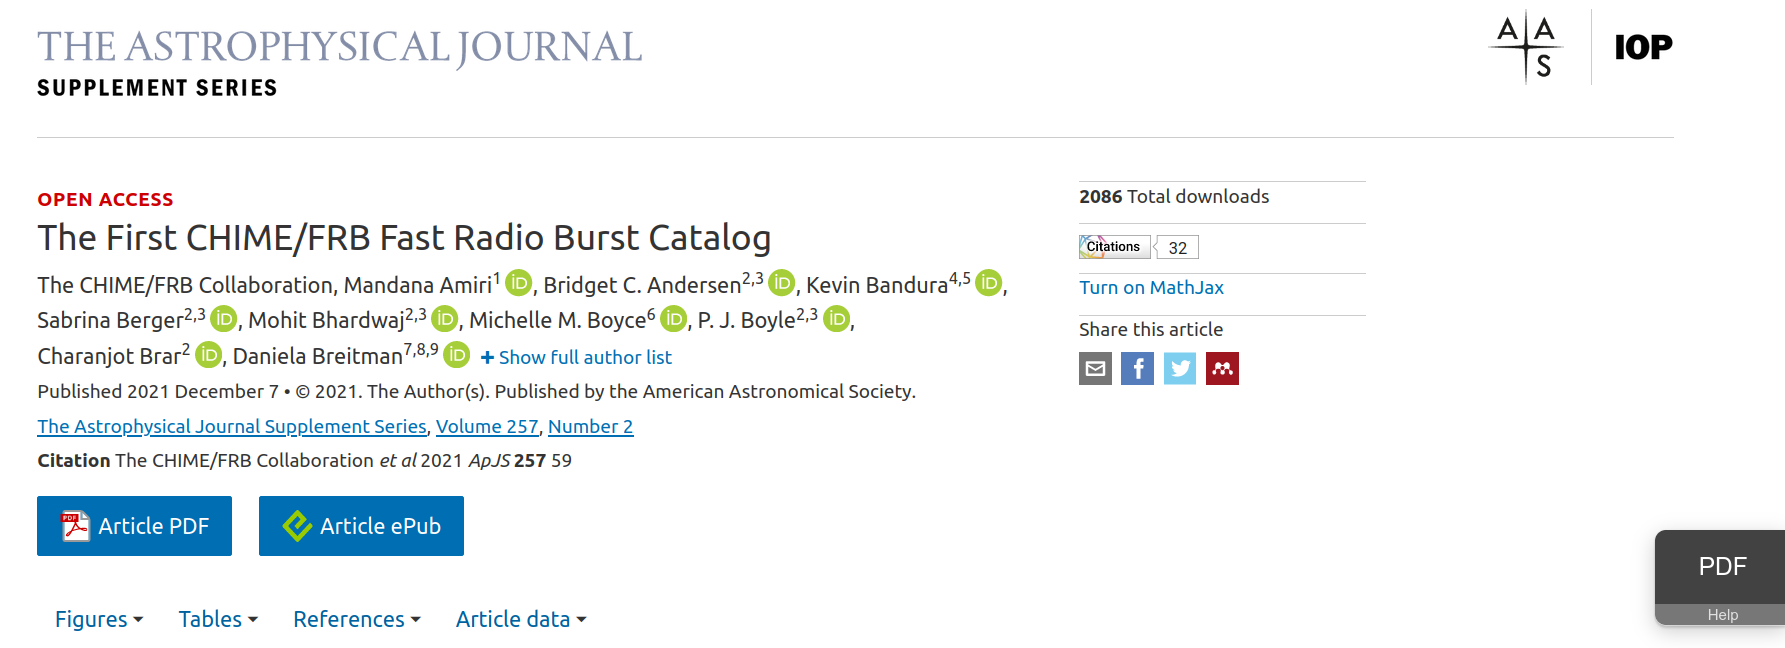

In [2]:
!pip install colorednoise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm
import io
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import colorednoise as cn
from matplotlib.pyplot import figure
import h5py
#%matplotlib inline

#Cloning Computational Statistics Repository
!git clone 'https://github.com/barauna-lo/Computational_Statistics.git' 



Cloning into 'Computational_Statistics'...
remote: Enumerating objects: 353, done.
remote: Counting objects: 100% (193/193), done.
remote: Compressing objects: 100% (107/107), done.
remote: Total 353 (delta 118), reused 142 (delta 86), pack-reused 160
Receiving objects: 100% (353/353), 26.74 MiB | 29.57 MiB/s, done.
Resolving deltas: 100% (173/173), done.


In [4]:
%cd Computational_Statistics/ 

/content/Computational_Statistics


In [5]:
#import function
import SpecplusV02 as specplus 
import MFDFA as mfdfa 
# 
% cd .. #Get out of the folders

[Errno 2] No such file or directory: '.. #Get out of the folders'
/content/Computational_Statistics


## Times Series FROM FRB

In [66]:
files = ['https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/files/vault/AstroDataCitationDOI/CISTI.CANFAR/21.0007/data/waterfalls/data/FRB20190701E_waterfall.h5',
 #'https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/files/vault/AstroDataCitationDOI/CISTI.CANFAR/21.0007/data/waterfalls/data/FRB20190701D_waterfall.h5',
 'https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/files/vault/AstroDataCitationDOI/CISTI.CANFAR/21.0007/data/waterfalls/data/FRB20190701C_waterfall.h5',
 'https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/files/vault/AstroDataCitationDOI/CISTI.CANFAR/21.0007/data/waterfalls/data/FRB20190701B_waterfall.h5',
 'https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/files/vault/AstroDataCitationDOI/CISTI.CANFAR/21.0007/data/waterfalls/data/FRB20190701A_waterfall.h5',
 'https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/files/vault/AstroDataCitationDOI/CISTI.CANFAR/21.0007/data/waterfalls/data/FRB20190630D_waterfall.h5']

In [22]:
!gdown "https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/files/vault/AstroDataCitationDOI/CISTI.CANFAR/21.0007/data/waterfalls/data/FRB20190701E_waterfall.h5"
#!gdown "https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/files/vault/AstroDataCitationDOI/CISTI.CANFAR/21.0007/data/waterfalls/data/FRB20190701D_waterfall.h5"
!gdown "https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/files/vault/AstroDataCitationDOI/CISTI.CANFAR/21.0007/data/waterfalls/data/FRB20190701C_waterfall.h5"
!gdown "https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/files/vault/AstroDataCitationDOI/CISTI.CANFAR/21.0007/data/waterfalls/data/FRB20190701B_waterfall.h5"
!gdown "https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/files/vault/AstroDataCitationDOI/CISTI.CANFAR/21.0007/data/waterfalls/data/FRB20190701A_waterfall.h5"
!gdown "https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/files/vault/AstroDataCitationDOI/CISTI.CANFAR/21.0007/data/waterfalls/data/FRB20190630D_waterfall.h5"
      


Downloading...
From: https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/files/vault/AstroDataCitationDOI/CISTI.CANFAR/21.0007/data/waterfalls/data/FRB20190701E_waterfall.h5
To: /content/Computational_Statistics/FRB20190701E_waterfall.h5
100% 35.5M/35.5M [00:01<00:00, 26.4MB/s]
Downloading...
From: https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/files/vault/AstroDataCitationDOI/CISTI.CANFAR/21.0007/data/waterfalls/data/FRB20190701D_waterfall.h5
To: /content/Computational_Statistics/FRB20190701D_waterfall.h5
100% 60.7M/60.7M [00:02<00:00, 30.3MB/s]
Downloading...
From: https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/files/vault/AstroDataCitationDOI/CISTI.CANFAR/21.0007/data/waterfalls/data/FRB20190701C_waterfall.h5
To: /content/Computational_Statistics/FRB20190701C_waterfall.h5
100% 35.5M/35.5M [00:01<00:00, 25.9MB/s]
Downloading...
From: https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/files/vault/AstroDataCitationDOI/CISTI.CANFAR/21.0007/data/waterfalls/data/FRB20190701B_waterfall.h5
To: /content/Comp

In [67]:
names, file_name = [],[]
for i in range(len(files)): 
  names.append(files[i][-25:-13])
  file_name.append(files[i][-25:])

In [159]:
df = pd.DataFrame()
for i in range(len(names)):
  data = h5py.File(file_name[i], "r")
  data = data["frb"]
  cal_wfall = data["calibrated_wfall"][:]
  cal_ts = np.nanmean(cal_wfall, axis = 0)
  df.insert(i,names[i],cal_ts)

In [96]:
columns = df.columns

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


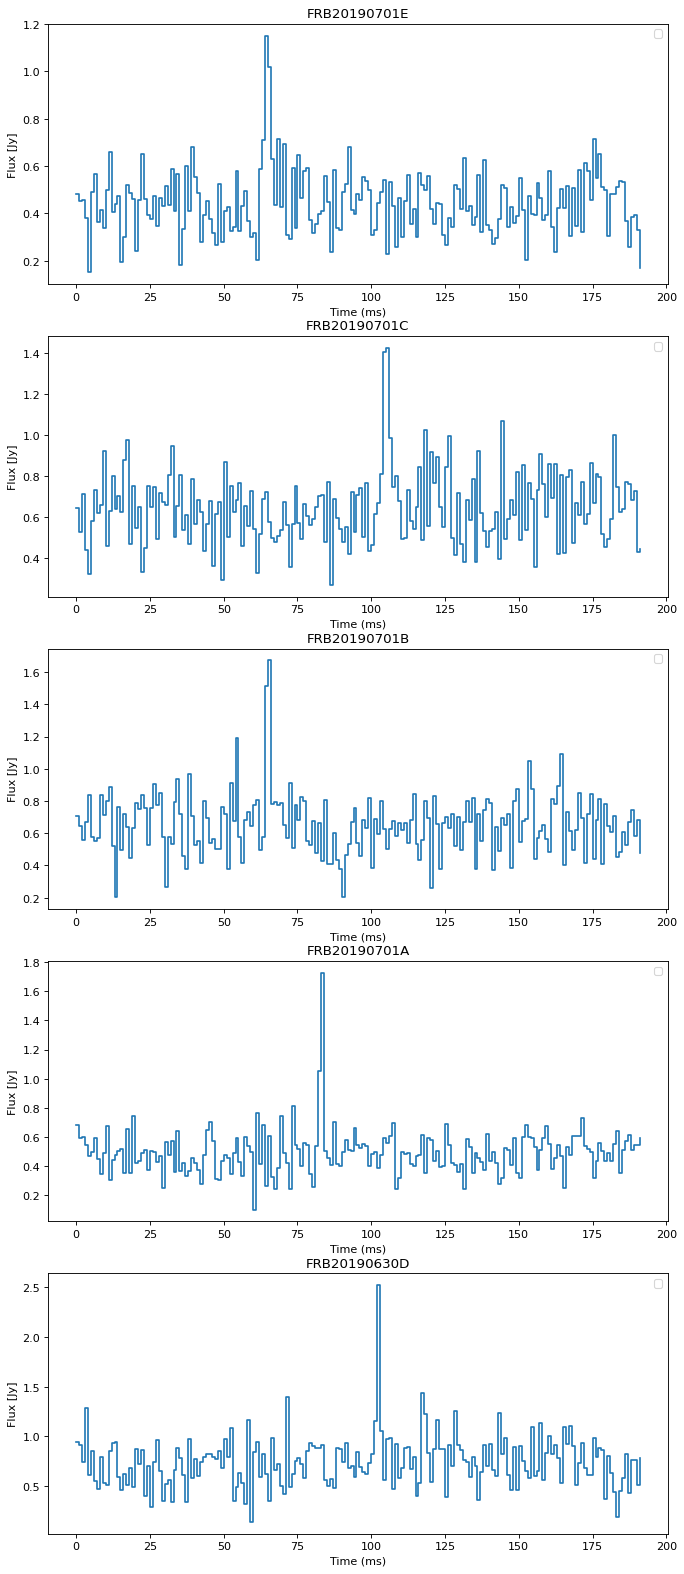

In [97]:
figure(figsize=(10,25),dpi=80)
for i in range(len(columns)):
  plt.subplot(len(columns),1,(i+1))
  plt.plot(df[columns[i]],drawstyle="steps-post")#,label=len(df[columns[i]]))
  plt.title(columns[i])
  plt.xlabel('Time (ms)')
  plt.ylabel('Flux [Jy]')
  plt.legend()
plt.show()

In [100]:
2**7

128

# Data Manipulation

Our time series has a quantity of 192 points which is equivalent to $2^{7.585}$ points. We will use two types of dataframe manipulation

1. **Data Subtrantion**

Reduced data to 128 points cropping to $2^6$ data points and 

2. **Data Augmentation** 

with enlarged data to $2^8$ data points. For this we will:

* Cutoff Outilieis and plot new series
* Generate a normal distribuition from the `mean` and `std` of  each series
* Split Data augmentation and insert at original time series

## Data Subtrantion

⚠️ Need to be automated

In [385]:
df_original = df #Alocating Original Times 
df_sub = pd.DataFrame(df[32:-32]) #cuting for 2^7 poins




## Data Augmantation 


To generate an increase in data, the initial idea was to generate a distribution of colored rigids according to the $\beta$ calculation for each time series. However, we found a divergent standard deviation of the series value without the exogenous term. Thus, we decided to use a normal distribution whose mean and standard deviation were the same as in the series without the burst.


$$ p(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} $$

For this we use the `random.normal` module of the numpy library where we can set up the `mean` and the `std`.



### Cutoff Outilieis and plot new series 📈

This is not the best way to make this cut! Each series will have missing data in different places, when we apply the dropana these points will be removed from ALL time series. In the end, when we return to the original series it won't make much difference. However, it would be interesting to cut, generate the distribution and concatenate one series at a time. That way only the ouliers from that series would be counted! Something to do in the future.

In [ ]:
df_remov = df[(df <= 6*df.std())] # 6σ look like a good cut point  
df_remov = df_remov.dropna() # removing nan values


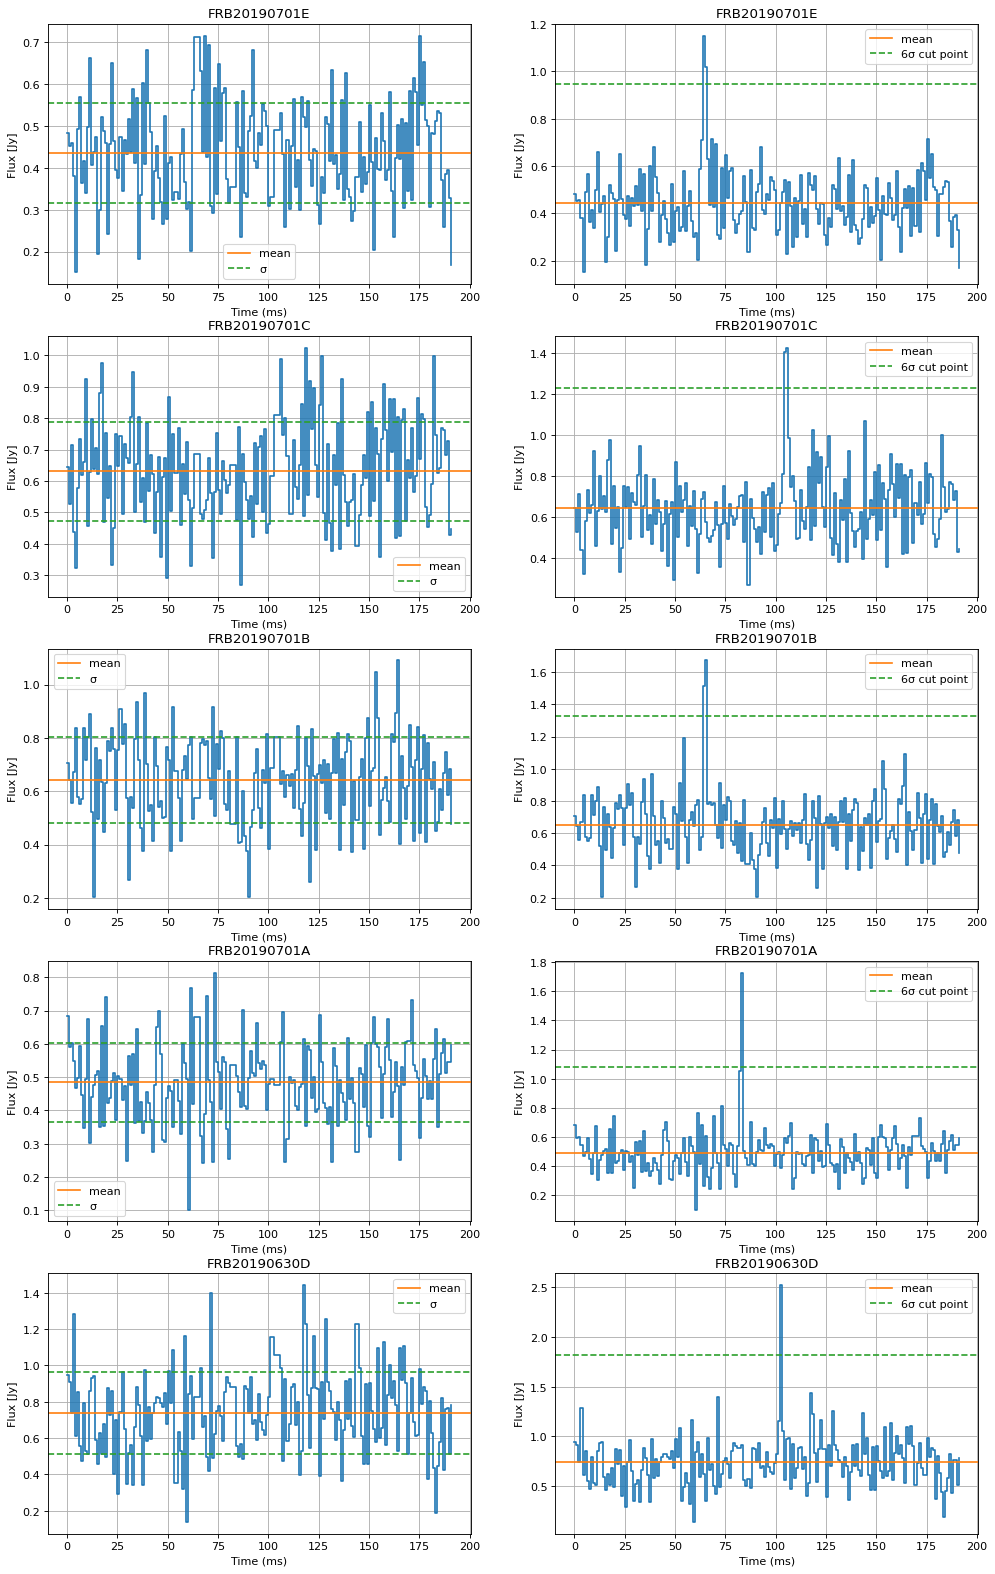

In [288]:
figure(figsize=(15,25),dpi=80)
for i in range(len(columns)):
  plt.subplot(len(columns),2,(2*i+1))
  plt.plot(df_remov[columns[i]],drawstyle="steps-post")#,label=len(df[columns[i]]))
  plt.axhline(y=df_remov[columns[i]].mean(),color='C1',label='mean')
  plt.axhline(y=df_remov[columns[i]].mean()+df_remov[columns[i]].std(),color='C2',label='σ',linestyle='--')
  plt.axhline(y=df_remov[columns[i]].mean()-df_remov[columns[i]].std(),color='C2',linestyle='--')
  plt.title(columns[i])
  plt.xlabel('Time (ms)')
  plt.ylabel('Flux [Jy]')
  plt.legend()
  plt.grid()

  plt.subplot(len(columns),2,(2*i+2))
  plt.plot(df[columns[i]],drawstyle="steps-post")#,label=len(df[columns[i]]))
  plt.axhline(y=df[columns[i]].mean(),color='C1',label='mean')
  plt.axhline(y=7*df[columns[i]].std(),color='C2',label='6σ cut point',linestyle='--')
  plt.title(columns[i])
  plt.xlabel('Time (ms)')
  plt.ylabel('Flux [Jy]')
  plt.legend()
  plt.grid()

plt.show()

### Generate a normal distribuition from the `mean` and `std` of  each series

In the end, my series should have a total of 2^8 dice. For this, we will define the size of the distribution proportional to the size of the series with the outliear values subtracted.

In [356]:
#Data Augmentation
augmentation = pd.DataFrame()

dataSize = (2**8 - len(df)) #The dataSize shoud
for i in range(len(beta)): 
  mu = df_remov[columns[i]].mean()
  sigma = df_remov[columns[i]].std()
  s = np.random.normal(mu, sigma, dataSize)
  augmentation.insert(i,columns[i],s)#,random_state=8666)) #insert new collums


In [362]:
# Cheking std values
print('augmentation data\n',augmentation.std(),'\n\nFRB_Data\n',df_remov.std())

augmentation data
 FRB20190701E    0.123486
FRB20190701C    0.152481
FRB20190701B    0.142651
FRB20190701A    0.112715
FRB20190630D    0.203561
dtype: float64 

FRB_Data
 FRB20190701E    0.118465
FRB20190701C    0.157008
FRB20190701B    0.160366
FRB20190701A    0.119157
FRB20190630D    0.225970
dtype: float64


### Split Data augmentation and insert at original time series

In [363]:
#Spliting condition
split = len(augmentation/2)
if (len(augmentation)%2) == 0:
        split = int(len(augmentation)/2)
else:
        split = int(len(augmentation)/2 + 1)

#Spliting
df_1 = colorData.iloc[:split,:]
df_2 = colorData.iloc[split:,:]

#Concat all data
df_aug = pd.concat([df_1,df,df_2],ignore_index=True)

#Check size of Data
np.log2(len(df_aug))


8.0

[]

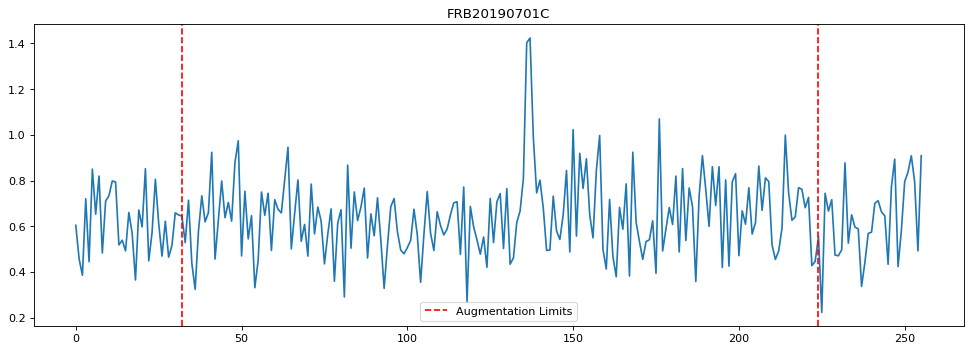

In [371]:
figure(figsize=(15,5),dpi=80)
#Ploting one of the Time Series data
i=1
plt.plot(df_aug[columns[i]])
plt.axvline(x = split, color = 'r', linestyle='--',label='Augmentation Limits')
plt.axvline(x = len(result)-split, color = 'r', linestyle='--')
plt.title(columns[i])
plt.legend()
plt.plot()


## Data Results

In [403]:
print('df_sub = 2^',np.log2(len(df_sub)),'points')
print('df_aug = 2^',np.log2(len(df_aug)),'points')

df_sub = 2^ 7.0 points
df_aug = 2^ 8.0 points


# Multifractal Analysis



To understand the mathmaticas behind this calculation see [this](https://github.com/barauna-lo/Computational_Statistics/blob/main/SpecplusV02.py) code from `specplus` library

$$ \gamma_1 = \frac{2}{7} (\bar{\alpha}-\beta) $$

`gamma1[0]` = $\alpha$

`gamma1[1]` = $\beta$

`gamma1[2]` = $\gamma$


In [401]:
alfa_sub, beta_sub, gamma1_sub = [],[],[]
alfa_aug, beta_aug, gamma1_aug = [],[],[]
gamma2_sub,dalpha_sub = [],[]
gamma2_aug,dalpha_aug = [],[]

print('Sub Data')
for i in range(len(columns)): 
    gamma2_sub.append(mfdfa.gamma2(df_sub[columns[i]])[0])
    dalpha_sub.append(mfdfa.gamma2(df_sub[columns[i]])[1])
    gamma1_sub.append(specplus.gamma1(df_sub[columns[i]])[2])
    beta_sub.append(  specplus.gamma1(df_sub[columns[i]])[1])
    print(columns[i]+' - Δα %g, γ2 %g, β1 %g' % (dalpha_sub[i] ,gamma2_sub[i],round(beta_sub[i],5)))


print('\nAug Data')
for i in range(len(columns)): 
    gamma2_aug.append(mfdfa.gamma2(df_aug[columns[i]])[0])
    dalpha_aug.append(mfdfa.gamma2(df_aug[columns[i]])[1])
    gamma1_aug.append(specplus.gamma1(df_aug[columns[i]])[2])
    beta_aug.append(  specplus.gamma1(df_aug[columns[i]])[1])
    print(columns[i]+' - Δα %g, γ2 %g, β1 %g' % (dalpha_aug[i] ,gamma2_aug[i],round(beta_aug[i],5)))
    



Sub Data
FRB20190701E - Δα 0.53146, γ2 0.354307, β1 -1.06484
FRB20190701C - Δα 0.885574, γ2 0.590383, β1 -1.01355
FRB20190701B - Δα 1.05209, γ2 0.701395, β1 -0.59609
FRB20190701A - Δα 1.17523, γ2 0.783485, β1 -1.18086
FRB20190630D - Δα 1.06726, γ2 0.711506, β1 -1.08472

Aug Data
FRB20190701E - Δα 0.499865, γ2 0.333243, β1 -0.67231
FRB20190701C - Δα 0.820468, γ2 0.546979, β1 -0.67542
FRB20190701B - Δα 0.862189, γ2 0.574792, β1 -0.07313
FRB20190701A - Δα 0.923075, γ2 0.615384, β1 -0.47277
FRB20190630D - Δα 1.01684, γ2 0.677894, β1 -0.38388




---



## Janelamento

Para realizarmos o _"Janelamento"_ iremos dividir nossa série temporal 4 partes. Então calcularemos os valores de $\gamma_1$ e $\gamma_2$ para cada janeja daquela série temporal

Shape of new dataframes - (32, 5) , (32, 5)


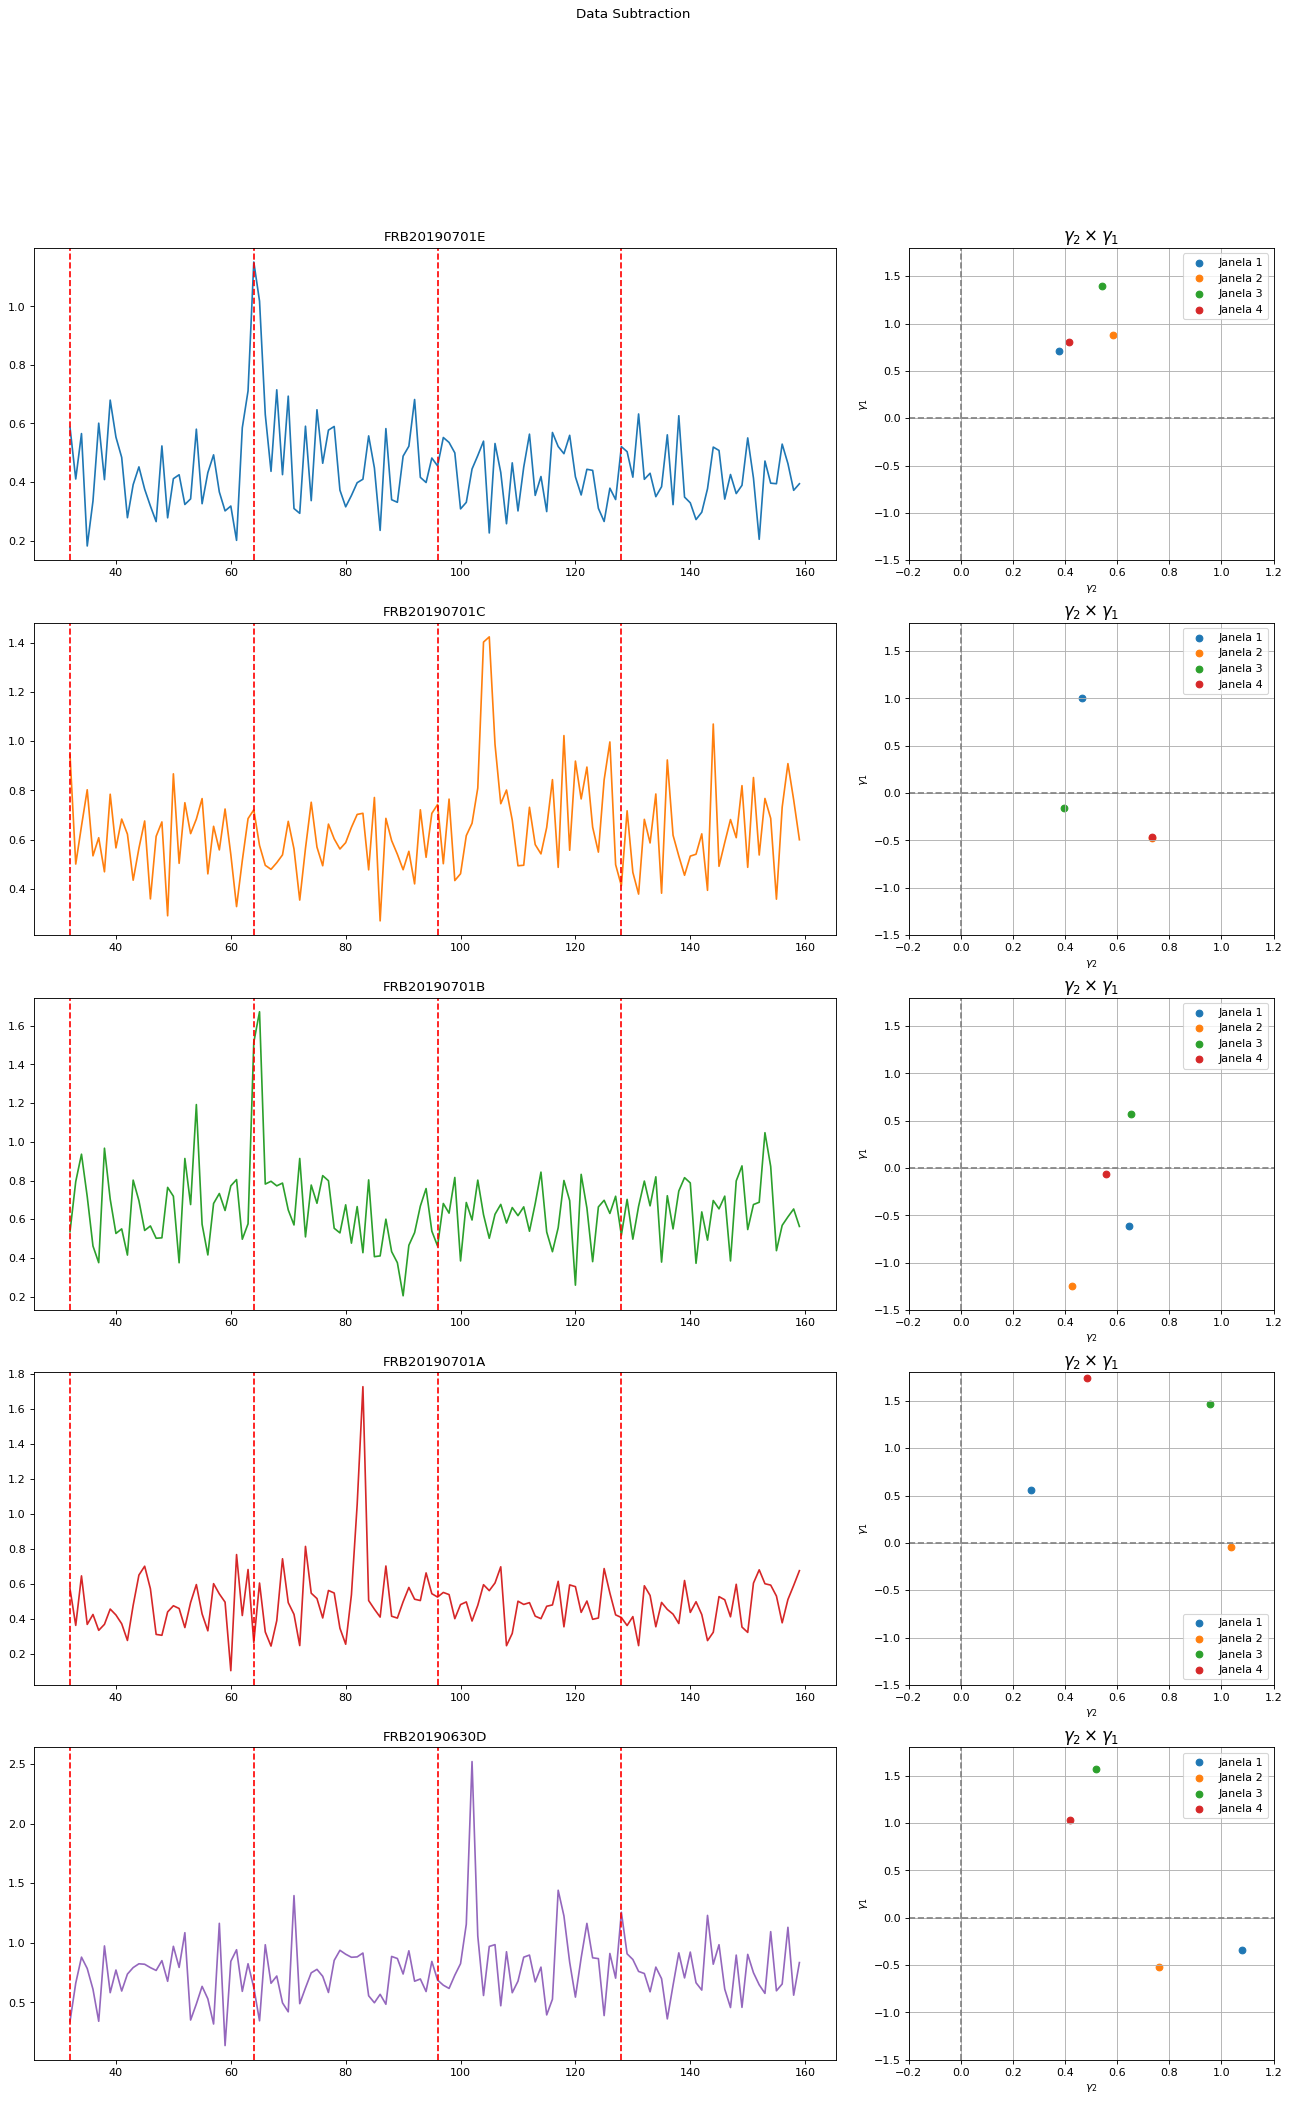

In [439]:
df = df_sub
# PRECISA SER AUTOMATIZADO
window = int(len(df)/4)
# splitting dataframe by row index
df_1 = df.iloc[:window,:]
df_2 = df.iloc[window:2*window,:]
df_3 = df.iloc[2*window:3*window,:]
df_4 = df.iloc[3*window:,:]
print("Shape of new dataframes - {} , {}".format(df_1.shape, df_2.shape))

#Alocating new gamma1 and gamma2
gamma1_win1,gamma1_win2,gamma1_win3,gamma1_win4= [],[],[],[]
gamma2_win1,gamma2_win2,gamma2_win3,gamma2_win4 = [] , [] , [] , []
dalpha_win1,dalpha_win2,dalpha_win3,dalpha_win4 = [] , [] , [] , []
for i in range(len(columns)): 
    gamma1_win1.append(specplus.gamma1(df_1[columns[i]])[2])
    gamma1_win2.append(specplus.gamma1(df_2[columns[i]])[2])
    gamma1_win3.append(specplus.gamma1(df_3[columns[i]])[2])
    gamma1_win4.append(specplus.gamma1(df_4[columns[i]])[2])
    
    gamma2_win1.append(mfdfa.gamma2(df_1[columns[i]])[0])
    gamma2_win2.append(mfdfa.gamma2(df_2[columns[i]])[0])
    gamma2_win3.append(mfdfa.gamma2(df_3[columns[i]])[0])
    gamma2_win4.append(mfdfa.gamma2(df_4[columns[i]])[0])

char_lines = len(columns)
char_colum = 3
figure(figsize=(20,6*char_lines),dpi=80)
cor = ['C0','C1','C2','C3','C4','C5','C6','C7',]
#i=0
for i in range(char_lines):
    plt.subplot(char_lines,char_colum,((3*i+1,3*i+2)))
    plt.plot(df[columns[i]],color=cor[i])
    plt.axvline(x=window,color='red',linestyle='--')
    plt.axvline(x=2*window,color='red',linestyle='--')
    plt.axvline(x=3*window,color='red',linestyle='--')
    plt.axvline(x=4*window,color='red',linestyle='--')
    plt.title(columns[i])

    plt.subplot(char_lines,char_colum,(3*(i+1)))
    plt.scatter(gamma2_win1[i],gamma1_win1[i],label='Janela 1')
    plt.scatter(gamma2_win2[i],gamma1_win2[i],label='Janela 2')
    plt.scatter(gamma2_win3[i],gamma1_win3[i],label='Janela 3')
    plt.scatter(gamma2_win4[i],gamma1_win4[i],label='Janela 4')
    plt.axhline(y = 0, color = 'gray', linestyle='--')
    plt.axvline(x = 0, color = 'gray', linestyle='--')
    plt.title(columns[i])
    plt.grid()
    plt.legend()
    plt.xlabel(r'$\gamma_2$')
    plt.ylabel(r'$\gamma_1$')
    plt.title(r'$\gamma_2 \times \gamma_1$',size=15)
    plt.xlim(-0.2,1.2)
    plt.ylim(-1.5,1.8)

plt.suptitle('Data Subtraction')  
plt.show()



Shape of new dataframes - (32, 5) , (32, 5)


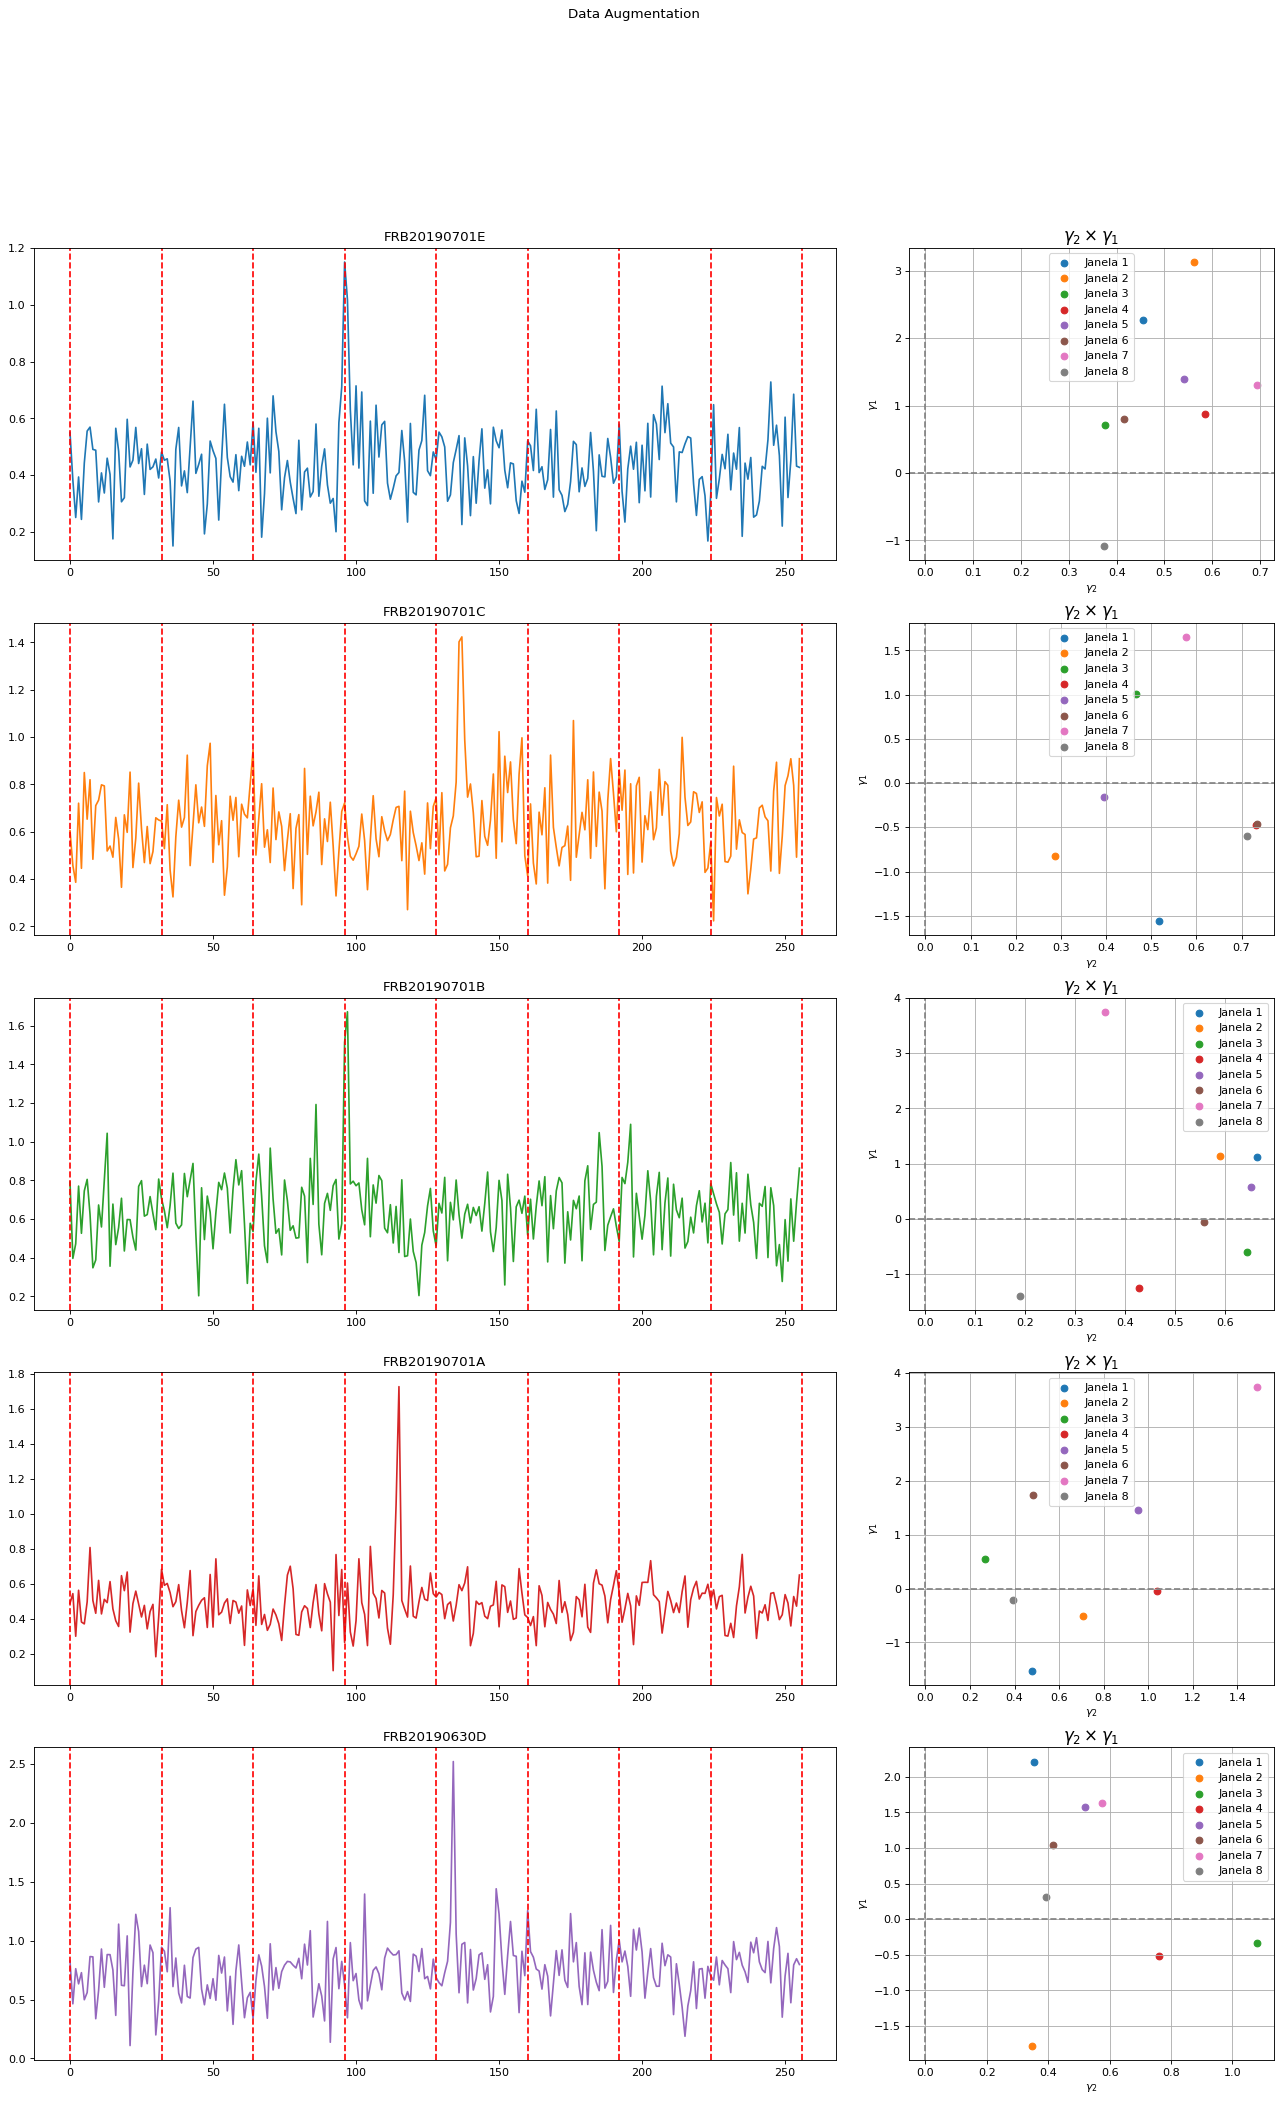

In [454]:
df = df_aug
# PRECISA SER AUTOMATIZADO
#window = int(len(df)/4)
# splitting dataframe by row index



df_1 = df.iloc[0*window:1*window,:]
df_2 = df.iloc[1*window:2*window,:]
df_3 = df.iloc[2*window:3*window,:]
df_4 = df.iloc[3*window:4*window,:]
df_5 = df.iloc[4*window:5*window,:]
df_6 = df.iloc[5*window:6*window,:]
df_7 = df.iloc[6*window:7*window,:]
df_8 = df.iloc[7*window:8*window,:]
print("Shape of new dataframes - {} , {}".format(df_1.shape, df_2.shape))

#Alocating new gamma1 and gamma2
gamma1_win1,gamma1_win2,gamma1_win3,gamma1_win4= [],[],[],[]
gamma2_win1,gamma2_win2,gamma2_win3,gamma2_win4 = [] , [] , [] , []
dalpha_win1,dalpha_win2,dalpha_win3,dalpha_win4 = [] , [] , [] , []

gamma1_win5,gamma1_win6,gamma1_win7,gamma1_win8= [],[],[],[]
gamma2_win5,gamma2_win6,gamma2_win7,gamma2_win8 = [] , [] , [] , []
dalpha_win5,dalpha_win6,dalpha_win7,dalpha_win8 = [] , [] , [] , []




for i in range(len(columns)): 
    gamma1_win1.append(specplus.gamma1(df_1[columns[i]])[2])
    gamma1_win2.append(specplus.gamma1(df_2[columns[i]])[2])
    gamma1_win3.append(specplus.gamma1(df_3[columns[i]])[2])
    gamma1_win4.append(specplus.gamma1(df_4[columns[i]])[2])
    gamma1_win5.append(specplus.gamma1(df_5[columns[i]])[2])
    gamma1_win6.append(specplus.gamma1(df_6[columns[i]])[2])
    gamma1_win7.append(specplus.gamma1(df_7[columns[i]])[2])
    gamma1_win8.append(specplus.gamma1(df_8[columns[i]])[2])
    
    gamma2_win1.append(mfdfa.gamma2(df_1[columns[i]])[0])
    gamma2_win2.append(mfdfa.gamma2(df_2[columns[i]])[0])
    gamma2_win3.append(mfdfa.gamma2(df_3[columns[i]])[0])
    gamma2_win4.append(mfdfa.gamma2(df_4[columns[i]])[0])
    gamma2_win5.append(mfdfa.gamma2(df_5[columns[i]])[0])
    gamma2_win6.append(mfdfa.gamma2(df_6[columns[i]])[0])
    gamma2_win7.append(mfdfa.gamma2(df_7[columns[i]])[0])
    gamma2_win8.append(mfdfa.gamma2(df_8[columns[i]])[0])

char_lines = len(columns)
char_colum = 3
figure(figsize=(20,6*char_lines),dpi=80)
cor = ['C0','C1','C2','C3','C4','C5','C6','C7',]
#i=0
for i in range(char_lines):
    plt.subplot(char_lines,char_colum,((3*i+1,3*i+2)))
    plt.plot(df[columns[i]],color=cor[i])
    plt.axvline(x=0*window,color='red',linestyle='--')
    plt.axvline(x=1*window,color='red',linestyle='--')
    plt.axvline(x=2*window,color='red',linestyle='--')
    plt.axvline(x=3*window,color='red',linestyle='--')
    plt.axvline(x=4*window,color='red',linestyle='--')
    plt.axvline(x=5*window,color='red',linestyle='--')
    plt.axvline(x=6*window,color='red',linestyle='--')
    plt.axvline(x=7*window,color='red',linestyle='--')
    plt.axvline(x=8*window,color='red',linestyle='--')
    plt.title(columns[i])

    plt.subplot(char_lines,char_colum,(3*(i+1)))
    plt.scatter(gamma2_win1[i],gamma1_win1[i],label='Janela 1')
    plt.scatter(gamma2_win2[i],gamma1_win2[i],label='Janela 2')
    plt.scatter(gamma2_win3[i],gamma1_win3[i],label='Janela 3')
    plt.scatter(gamma2_win4[i],gamma1_win4[i],label='Janela 4')
    plt.scatter(gamma2_win5[i],gamma1_win5[i],label='Janela 5')
    plt.scatter(gamma2_win6[i],gamma1_win6[i],label='Janela 6')
    plt.scatter(gamma2_win7[i],gamma1_win7[i],label='Janela 7')
    plt.scatter(gamma2_win8[i],gamma1_win8[i],label='Janela 8')

    plt.axhline(y = 0, color = 'gray', linestyle='--')
    plt.axvline(x = 0, color = 'gray', linestyle='--')
    plt.title(columns[i])
    plt.grid()
    plt.legend()
    plt.xlabel(r'$\gamma_2$')
    plt.ylabel(r'$\gamma_1$')
    plt.title(r'$\gamma_2 \times \gamma_1$',size=15)
    #plt.xlim(-0.2,1.2)
    #plt.ylim(-1.5,1.8)

plt.suptitle('Data Augmentation')  
plt.show()



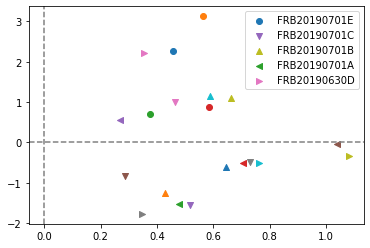

In [451]:

markers = ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']
for i in range(len(columns)): 
  plt.scatter(gamma2_win1[i],gamma1_win1[i],marker=markers[i],label=columns[i],)
  plt.scatter(gamma2_win2[i],gamma1_win2[i],marker=markers[i])
  plt.scatter(gamma2_win3[i],gamma1_win3[i],marker=markers[i])
  plt.scatter(gamma2_win4[i],gamma1_win4[i],marker=markers[i])
plt.axhline(y = 0, color = 'gray', linestyle='--')
plt.axvline(x = 0, color = 'gray', linestyle='--')
plt.legend()  
plt.show()

### Analysis Function
Complet Data Analyse for all tools allready used

In [480]:

i=0
dx = df_aug[columns[i]]
#specplus.main(dx,columns[i])
def analy(dx,title):
  [timeMeasure, meanDataMeasure, scales] = mfdfa.getHurstByUpscaling(dx)                    # Set of parameters No. 1
  #[timeMeasure, meanDataMeasure, scales] = getHurstByUpscaling(dx, 3.0, 0, 2.0)       # Set of parameters No. 2
  [bScale, bDM, bsIndex, HMajor, HMinor] = mfdfa.getScalingExponents(timeMeasure, meanDataMeasure)
  # Modified first-order MF-DFA
  [_, dataMeasure, _, stats, q] = mfdfa.getMSSByUpscaling(dx, isNormalised = 1)


  # Modified first-order DFA
  [timeMeasure, meanDataMeasure, scales] = mfdfa.getHurstByUpscaling(dx)                    # Set of parameters No. 1
  #[timeMeasure, meanDataMeasure, scales] = getHurstByUpscaling(dx, 3.0, 0, 2.0)       # Set of parameters No. 2

  [bScale, bDM, bsIndex, HMajor, HMinor] = mfdfa.getScalingExponents(timeMeasure, meanDataMeasure)


  lines   = 3 
  colunas = 2


  # Output
  # Modified first-order DFA
  figure(figsize=(25,15),dpi=80)
  plt.subplot(lines, colunas, 1)
  plt.loglog(timeMeasure, meanDataMeasure, 'ko-')
  plt.xlabel(r'$\mu(t)$')
  plt.ylabel(r'$\mu(\Delta x)$')
  plt.grid('on', which = 'minor')
  plt.title('Modified First-Order DFA of a Multifractal Noise')

  plt.subplot(lines, colunas, 2)
  plt.loglog(scales, meanDataMeasure, 'ko-')
  plt.loglog(bScale, bDM, 'ro')
  plt.xlabel(r'$j$')
  plt.ylabel(r'$\mu(\Delta x)$')
  plt.grid('on', which = 'minor')

  # Modified first-order MF-DFA

  plt.subplot(lines, colunas, 3)
  nq = np.int(len(q))
  leg_txt = []
  for qi in range(1, nq + 1):
      llh = plt.loglog(scales, dataMeasure[qi - 1, :], 'o-')
      leg_txt.append('tau = %g (q = %g)' % (stats['tau'][qi - 1], q[qi - 1]))
  plt.xlabel(r'$j$')
  plt.ylabel(r'$\mu(\Delta x, q)$')
  plt.grid('on', which = 'minor')
  plt.title('Modified First-Order MF-DFA of a Multifractal Noise')
  #plt.legend(leg_txt)


  plt.subplot(lines, colunas, 4)
  plt.plot(q, stats['tau'], 'ko-')
  plt.xlabel(r'$q$')
  plt.ylabel(r'$\tau(q)$')
  plt.grid('on', which = 'major')
  plt.title('Statistics of Modified First-Order MF-DFA of a Multifractal Noise')


  plt.subplot(lines, colunas, 5)
  plt.plot(stats['LH'], stats['f'], 'ko-')
  plt.xlabel(r'$\alpha$')
  plt.ylabel(r'$f(\alpha)$')
  # plt.grid('on', which = 'major')

  plt.subplot(lines, colunas, 6)
  sns.distplot(dx, bins=40, hist_kws={'edgecolor':'black'})
  plt.ylabel('Frequency of A per bin')
  plt.xlabel('Blue Bins')
  plt.title('Kenal Density Function for '+title)
  #specplus.cullenfreyGEV(dx)

  plt.suptitle("Mutifractal Analysis of "+title)
  plt.show()

  #PRINTING SPECTRUM PARAMETERS
  # print('alpha_min = %g, alpha_max = %g, dalpha = %g' % (stats['LH_min'], stats['LH_max'], stats['LH_max'] - stats['LH_min']))
  # print('h_min = %g, h_max = %g, dh = %g\n' % (stats['h_min'], stats['h_max'], stats['h_max'] - stats['h_min']))




## Analys Results

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


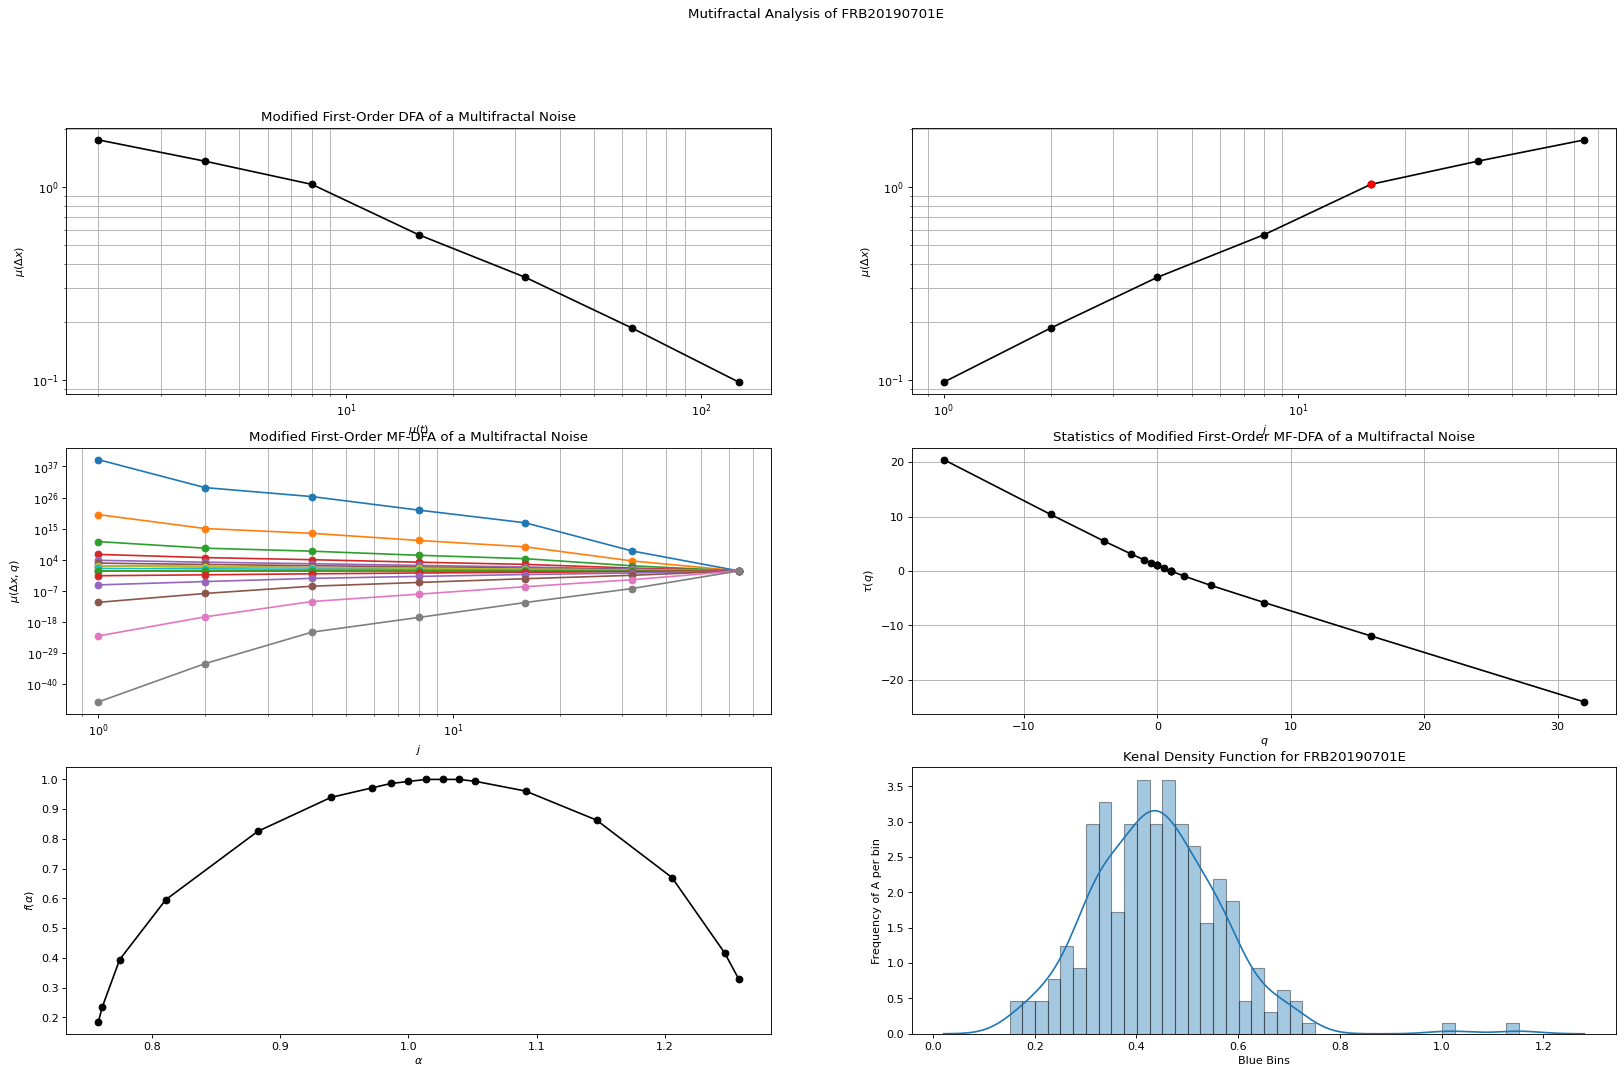

<Figure size 2500x2500 with 0 Axes>

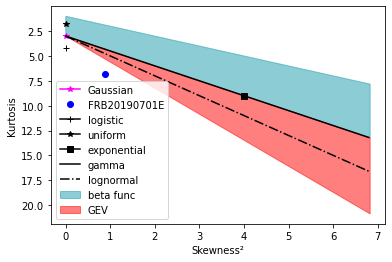

In [486]:
i=0
analy(df_aug[columns[i]],columns[i])
specplus.cullenfreyGEV(df_aug[columns[i]],columns[i])

### SPECPLUS function

⚠️ Need to be corrected on the `.py` file


In [472]:

def spec(dx,title):
	#Salvando o conjuntos de dados em um arquivo `.csv` sem os `index` 
	#e sem o `header`

	#Esse formator é importante pois será dessa forma que a proxima célula irá 
	#converter o arquivo de `.csv` para `.txt`
	df.to_csv("df.csv", index=False, header=False)

	#########
	#### 4. 
	#########


	# O formato `Swind4096.txt` é o que a a função `specPlus` espera como entrada.
	# É possível fazer a alteração diramenten na função na linha 151 da célula 
	# abaixo. Porem, para evitar alterar o código descidi deixar o formato inicial
	import csv
	with open("Swind4096.txt", "w") as my_output_file: 
			with open("df.csv", "r") as my_input_file: [ my_output_file.write(" ".join(row)+'\n') for row in csv.reader(my_input_file)]
			my_output_file.close()

	# SPECPLUS.PY (processamento de apenas 01 módulo google colab para obter o output).

	# Obtem os espectros PSD (power spctrum density) e DFA (dentreded fluctuation analysis) para uma série temporal

	# com

	# pontos.

	# ------------------------------------------------------------------------
	# SpecplusV01.py
	# ------------------------------------------------------------------------
	import matplotlib.pyplot as plt
	import matplotlib.mlab as mlab
	from scipy import stats, optimize
	import numpy as np
	import math

	__author__ = 'Paulo Giovani'
	__copyright__ = 'Copyright 2017, 3DBMO Project INPE'
	__credits__ = ['Paulo Giovani', 'Reinaldo Roberto Rosa', 'Murilo da Silva Dantas']
	__license__ = 'GPL'
	__version__ = '0.1B'
	__maintainer__ = 'Paulo Giovani'
	__email__ = 'pg_faria@yahoo.com.br'

	#---------------------------------------------------------------------
	# Calcula o PSD da série temporal
	#---------------------------------------------------------------------
	def psd(data):
		"""Calcula o PSD de uma série temporal."""
		
		# Define um intervalo para realizar o ajuste da reta
		INICIO = 1
		FIM = len(dx) -65
		
		# O vetor com o tempo é o tamanho do número de pontos
		N = len(data)
		tempo = np.arange(len(data))

		# Define a frequência de amostragem
		dt = (tempo[-1] - tempo[0] / (N - 1))
		fs = 1 / dt

		# Calcula o PSD utilizando o MLAB
		power, freqs = mlab.psd(data, Fs = fs, NFFT = N, scale_by_freq = False)

		# Calcula a porcentagem de pontos utilizados na reta de ajuste
		totalFrequencias = len(freqs)
		totalPSD = FIM - INICIO
		porcentagemPSD = int(100 * totalPSD / totalFrequencias)

		# Seleciona os dados dentro do intervalo de seleção
		xdata = freqs[INICIO:FIM]
		ydata = power[INICIO:FIM]

		# Simula o erro
		yerr = 0.2 * ydata

		# Define uma função para calcular a Lei de Potência
		powerlaw = lambda x, amp, index: amp * (x**index)

		# Converte os dados para o formato LOG
		logx = np.log10(xdata)
		logy = np.log10(ydata)

		# Define a função para realizar o ajuste
		fitfunc = lambda p, x: p[0] + p[1] * x
		errfunc = lambda p, x, y, err: (y - fitfunc(p, x)) / err    
		logyerr = yerr / ydata

		# Calcula a reta de ajuste
		pinit = [1.0, -1.0]
		out = optimize.leastsq(errfunc, pinit, args = (logx, logy, logyerr), full_output = 1)    
		pfinal = out[0]
		covar = out[1]
		index = pfinal[1]
		amp = 10.0 ** pfinal[0]
		indexErr = np.sqrt(covar[0][0])
		ampErr = np.sqrt(covar[1][1]) * amp
		
		# Retorna os valores obtidos
		return freqs, power, xdata, ydata, amp, index, powerlaw, INICIO, FIM
		
	#---------------------------------------------------------------------
	# Calcula o DFA 1D da série temporal
	#---------------------------------------------------------------------
	def dfa1d(timeSeries, grau):
		"""Calcula o DFA 1D (adaptado de Physionet), onde a escala cresce
		de acordo com a variável 'Boxratio'. Retorna o array 'vetoutput', 
		onde a primeira coluna é o log da escala S e a segunda coluna é o
		log da função de flutuação."""

		# 1. A série temporal {Xk} com k = 1, ..., N é integrada na chamada função perfil Y(k)
		x = np.mean(timeSeries)
		timeSeries = timeSeries - x
		yk = np.cumsum(timeSeries)
		tam = len(timeSeries)

		# 2. A série (ou perfil) Y(k) é dividida em N intervalos não sobrepostos de tamanho S
		sf = np.ceil(tam / 4).astype(np.int)
		boxratio = np.power(2.0, 1.0 / 8.0)
		vetoutput = np.zeros(shape = (1,2))

		s = 4
		while s <= sf:        
			serie = yk        
			if np.mod(tam, s) != 0:
				l = s * int(np.trunc(tam/s))
				serie = yk[0:l]			
			t = np.arange(s, len(serie), s)
			v = np.array(np.array_split(serie, t))
			l = len(v)
			x = np.arange(1, s + 1)
			
			# 3. Calcula-se a variância para cada segmento v = 1,…, n_s:
			p = np.polynomial.polynomial.polyfit(x, v.T, grau)
			yfit = np.polynomial.polynomial.polyval(x, p)
			vetvar = np.var(v - yfit)
			
			# 4. Calcula-se a função de flutuação DFA como a média das variâncias de cada intervalo
			fs = np.sqrt(np.mean(vetvar))
			vetoutput = np.vstack((vetoutput,[s, fs]))
			
			# A escala S cresce numa série geométrica
			s = np.ceil(s * boxratio).astype(np.int)

		# Array com o log da escala S e o log da função de flutuação   
		vetoutput = np.log10(vetoutput[1::1,:])

		# Separa as colunas do vetor 'vetoutput'
		x = vetoutput[:,0]
		y = vetoutput[:,1]

		# Regressão linear
		slope, intercept, _, _, _ = stats.linregress(x, y)

		# Calcula a reta de inclinação
		predict_y = intercept + slope * x

		# Calcula o erro
		pred_error = y - predict_y

		# Retorna o valor do ALFA, o vetor 'vetoutput', os vetores X e Y,
		# o vetor com os valores da reta de inclinação e o vetor de erros
		return slope, vetoutput, x, y, predict_y, pred_error

	#---------------------------------------------------------------------
	# Trecho principal
	#---------------------------------------------------------------------
	def main():
		"""Função com o código princiapl do programa."""
		
		print("\nData Analysis for 3DBMO simulations...\n")
		
		# Desabilita as mensagens de erro do Numpy (warnings)
		old_settings = np.seterr(divide = 'ignore', invalid = 'ignore', over = 'ignore')
		
		# Carrega o arquivo de dados
		nomeArquivo = 'Swind4096.txt'		
		data = np.genfromtxt(nomeArquivo,
													delimiter = ',',
													dtype = 'float32',
													filling_values = 0)
		
		# Exibe os primeiro N valores do arquivo
		N = 10
		print("Original time series data (%d points): \n" %(len(data)))
		print("First %d points: %s\n" %(N, data[0:10]))
		print()
		
		#-----------------------------------------------------------------
			# Parâmetros gerais de plotagem
			#-----------------------------------------------------------------
		
		# Define os subplots
		fig = plt.figure()
		fig.subplots_adjust(hspace = .3, wspace = .2)
		
		# Tamanho das fontes
		tamanhoFonteEixoX = 16
		tamanhoFonteEixoY = 16
		tamanhoFonteTitulo = 16
		tamanhoFontePrincipal = 25
		
		# Título principal
		tituloPrincipal = 'Spectral Time Series Analysis of '+str(title) 	
		
		#-----------------------------------------------------------------
			# Plotagem da série original
			#-----------------------------------------------------------------
		
		# Define as cores da plotagem
		corSerieOriginal = 'r'
		
		# Título dos eixos da série original
		textoEixoX = 'Tempo'
		textoEixoY = 'Amplitude'
		textoTituloOriginal = 'Original Time Series Data'
		
		print("1. Plotting time series data...")
		
		# Plotagem da série de dados    
		#O = fig.add_subplot(1, 3, 1)    
		O = fig.add_subplot(2, 1, 1)
		O.plot(data, '-', color = corSerieOriginal)
		O.set_title(textoTituloOriginal, fontsize = tamanhoFonteTitulo)
		O.set_xlabel(textoEixoX, fontsize = tamanhoFonteEixoX)
		O.set_ylabel(textoEixoY, fontsize = tamanhoFonteEixoY)
		O.ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))
		O.grid()
		
		#-----------------------------------------------------------------
			# Cálculo e plotagem do PSD
			#-----------------------------------------------------------------
		
		# Calcula o PSD
		freqs, power, xdata, ydata, amp, index, powerlaw, INICIO, FIM = psd(data)

		# O valor do beta equivale ao index
		b = index

		# Define as cores da plotagem
		corPSD1 = 'k'
		corPSD2 = 'navy'

		# Título dos eixos do PSD
		textoPSDX = 'Frequência (Hz)'
		textoPSDY = 'Potência'
		textoTituloPSD = r'Power Spectrum Density $\beta$ = '
		
		print("2. Plotting Power Spectrum Density...")

		# Plotagem do PSD    
		PSD = fig.add_subplot(2, 2, 3)    
		PSD.plot(freqs, power, '-', color = corPSD1, alpha = 0.7)
		PSD.plot(xdata, ydata, color = corPSD2, alpha = 0.8)
		PSD.axvline(freqs[INICIO], color = corPSD2, linestyle = '--')
		PSD.axvline(freqs[FIM], color = corPSD2, linestyle = '--')    
		PSD.plot(xdata, powerlaw(xdata, amp, index), 'r-', linewidth = 1.5, label = '$%.4f$' %(b))    
		PSD.set_xlabel(textoPSDX, fontsize = tamanhoFonteEixoX)
		PSD.set_ylabel(textoPSDY, fontsize = tamanhoFonteEixoY)
		PSD.set_title(textoTituloPSD + '%.4f' %(b), loc = 'center', fontsize = tamanhoFonteTitulo)
		PSD.set_yscale('log')
		PSD.set_xscale('log')
		PSD.grid() 
		
		#-----------------------------------------------------------------
		# Cálculo e plotagem do DFA
			#-----------------------------------------------------------------
						
		# Calcula o DFA 1D
		alfa, vetoutput, x, y, reta, erro = dfa1d(data, 1)

		# Verifica se o DFA possui um valor válido
		# Em caso afirmativo, faz a plotagem
		if not math.isnan(alfa):
			
			# Define as cores da plotagem
			corDFA = 'darkmagenta'

			# Título dos eixos do DFA
			textoDFAX = '$log_{10}$ (s)'
			textoDFAY = '$log_{10}$ F(s)'
			textoTituloDFA = r'Detrended Fluctuation Analysis $\alpha$ = '
			
			print("3. Plotting Detrended Fluctuation Analysis...")
			
			# Plotagem do DFA 
			DFA = fig.add_subplot(2, 2, 4)    
			DFA.plot(x, y, 's', 
					color = corDFA, 
					markersize = 4,
					markeredgecolor = 'r',
					markerfacecolor = 'None',
					alpha = 0.8)				 
			DFA.plot(x, reta, '-', color = corDFA, linewidth = 1.5)
			DFA.set_title(textoTituloDFA + '%.4f' %(alfa), loc = 'center', fontsize = tamanhoFonteTitulo)
			DFA.set_xlabel(textoDFAX, fontsize = tamanhoFonteEixoX)
			DFA.set_ylabel(textoDFAY, fontsize = tamanhoFonteEixoY)
			DFA.grid()

		else:  
			DFA = fig.add_subplot(2, 2, 4)
			DFA.set_title(textoTituloDFA + 'N.A.', loc = 'center', fontsize = tamanhoFonteTitulo)
			DFA.grid()

		#-----------------------------------------------------------------
		# Exibe e salva a figura
		#-----------------------------------------------------------------
		plt.suptitle(tituloPrincipal, fontsize = tamanhoFontePrincipal)
		nomeImagem = '3DBMO_PSD_DFA_2.png'
		fig.set_size_inches(15, 9)
		plt.savefig(nomeImagem, dpi = 300, bbox_inches = 'tight', pad_inches = 0.1)	
		plt.show()
			
	#---------------------------------------------------------------------
	# Trecho principal
	#---------------------------------------------------------------------
	if __name__ == "__main__":
		main()



## SpecPLus Results


Data Analysis for 3DBMO simulations...

Original time series data (128 points): 

First 10 points: [0.5866073  0.41040498 0.565517   0.18166557 0.3351529  0.6010451
 0.40827876 0.6797891  0.55336905 0.48414654]


1. Plotting time series data...
2. Plotting Power Spectrum Density...
3. Plotting Detrended Fluctuation Analysis...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:122: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:147: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprec

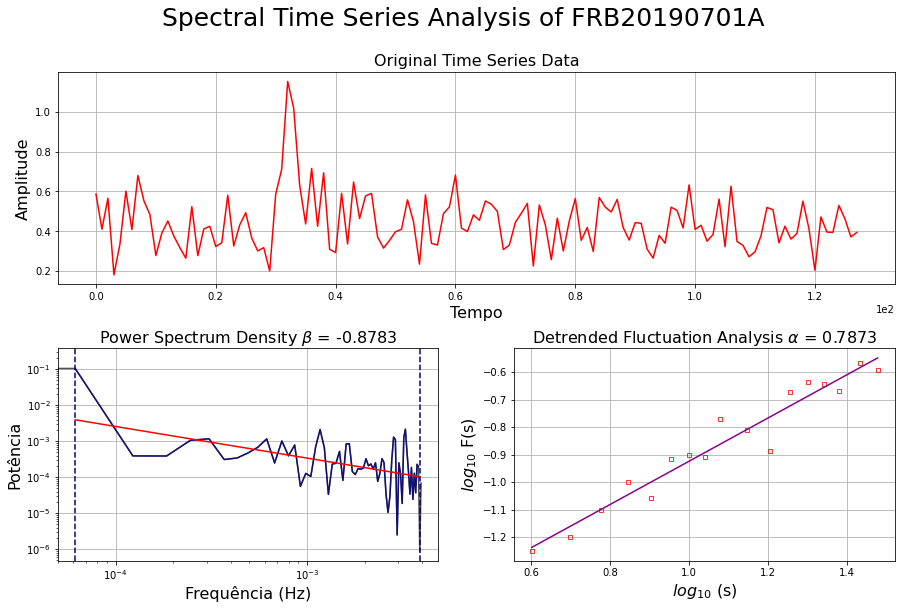

In [475]:
i=3
spec(df_sub[columns[i]],columns[i])

# References 

https://www.adamsmith.haus/python/answers/how-to-split-a-pandas-dataframe-column-in-python 

https://realpython.com/pandas-merge-join-and-concat/

https://www.canfar.net/storage/vault/list/AstroDataCitationDOI/CISTI.CANFAR/21.0007/data/waterfalls/data 

https://www.geeksforgeeks.org/how-to-combine-two-dataframe-in-python-pandas/

https://towardsdatascience.com/pandas-concat-tricks-you-should-know-to-speed-up-your-data-analysis-cd3d4fdfe6dd

https://towardsdatascience.com/pandas-concat-tricks-you-should-know-to-speed-up-your-data-analysis-cd3d4fdfe6dd



---

